## Procedure: Uncertainty propagation for matrix-based LCA
### Method: Analytic uncertainty propagation (Taylor approximation)
Author: Evelyne Groen {evelyne [dot] groen [at] gmail [dot] com}

Last update: 25/10/2016


    

In [9]:
import numpy as np 

A_det = np.matrix('10 0; -2 100') #A-matrix
B_det = np.matrix('1 10')         #B-matrix
f = np.matrix('1000; 0')          #Functional unit vector f

g_LCA = B_det * A_det.I * f 

print("The deterministic result is:", g_LCA[0,0])                  



The deterministic result is: 120.0


### Step 1: Calculate partial derivatives
NB: this is a vectorized implementation of the MatLab code that was originally written by Reinout Heijungs & Sangwong Suh



In [11]:
s = A_det.I * f                                 #scaling vector s: inv(A_det)*f
Lambda = B_det * A_det.I;                       #B_det*inv(A)

dgdA = -(s * Lambda).T                          #Partial derivatives A-matrix
Gamma_A = np.multiply((A_det/g_LCA), dgdA)      #For free: the multipliers of the A-matrix
print("The multipliers of the A-matrix are:")
print(Gamma_A)

dgdB = s.T                                      #Partial derivatives B-matrix
Gamma_B = np.multiply((B_det/g_LCA), dgdB)      #For free too: the multipliers of the B-matrix
print("The multipliers of the B-matrix are:")
print(Gamma_B)

The multipliers of the A-matrix are:
[[-1.         -0.        ]
 [ 0.16666667 -0.16666667]]
The multipliers of the B-matrix are:
[[ 0.83333333  0.16666667]]


### Step 2: Determine output variance

In [12]:
CV = 0.05                             #Coefficient of variation set to 5% (CV = sigma/mu)
var_A = np.power(abs(CV*A_det),2)     #Variance of the A-matrix (var =sigma^2)
var_B = np.power(abs(CV*B_det),2)     #Variance of the B-matrix
 
P = np.concatenate((np.reshape(dgdA, 4), dgdB), axis=1)       #P contains partial derivatives of both A and B 
var_P = np.concatenate((np.reshape(var_A, 4), var_B), axis=1) #var_P contains all variances of each parameter in A and B

var_g = np.sum(np.multiply(np.power(P, 2), var_P))               #Total output variance (first order Taylor)

print("The total output variance equals:", var_g)



The total output variance equals: 64.0


### Step 3: Calculate the contribution to the output variance by the indivudial input parameters

In [33]:
KIA = np.multiply(np.power(P, 2), var_P)/var_g
KIA_procent = [KIA[0][0,k]*100 for k in range(0,6)]
print("The contribution to the output variance of each intput parameter equals (in %):")
print(KIA_procent)

The contribution to the output variance of each intput parameter equals (in %):
[56.25, 0.0, 1.5625, 1.5625, 39.062499999999993, 1.5624999999999996]


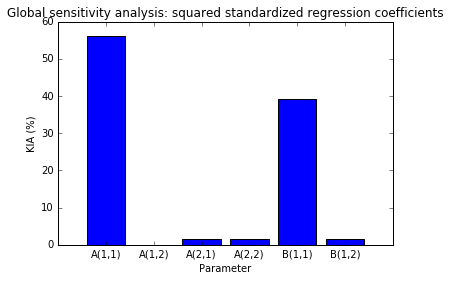

In [34]:
#Visualize: make a bar plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

x_label=[ 'A(1,1)','A(1,2)', 'A(2,1)', 'A(2,2)', 'B(1,1)', 'B(1,2)']
x_pos = range(6)
plt.bar(x_pos, KIA_procent, align='center')
plt.xticks(x_pos, x_label)
plt.title('Global sensitivity analysis: squared standardized regression coefficients')
plt.ylabel('KIA (%)')
plt.xlabel('Parameter')
plt.show()